In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

[Text(133.92000000000002, 181.2, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(200.88000000000002, 108.72, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

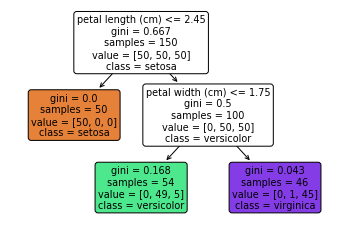

In [11]:
from sklearn.tree import export_graphviz, plot_tree

plot_tree(tree_clf, feature_names = iris.feature_names[2:],
class_names=iris.target_names, rounded = True, filled=True)

## Gini at green node:
gini = $ 1 - \sum_k p_{i, k} ^2 $

In [20]:
1 - (0/54)**2 - (49/54)**2 - (5/54)**2

0.1680384087791495

In [14]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

[Text(133.92000000000002, 181.2, 'petal length (cm) <= 2.45\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(200.88000000000002, 108.72, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

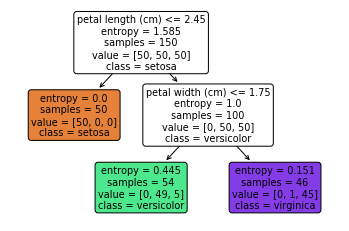

In [16]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_clf.fit(X, y)
plot_tree(tree_clf, feature_names = iris.feature_names[2:],
class_names=iris.target_names, rounded = True, filled=True)

## Entropy at green node:
$ H_i = - \sum_k P_{i,k} log2 (P_{i,k}) $
= -(49/54)*log2(49/54) -(5/54)*log2(5/54) = 0.445


In [23]:
-(49/54)*np.log2(49/54) -(5/54)*np.log2(5/54)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.44506485705083865

[Text(133.92000000000002, 181.2, 'petal width (cm) <= 0.8\nmse = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(66.96000000000001, 108.72, 'mse = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(200.88000000000002, 108.72, 'petal width (cm) <= 1.75\nmse = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(133.92000000000002, 36.23999999999998, 'mse = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(267.84000000000003, 36.23999999999998, 'mse = 0.021\nsamples = 46\nvalue = 1.978')]

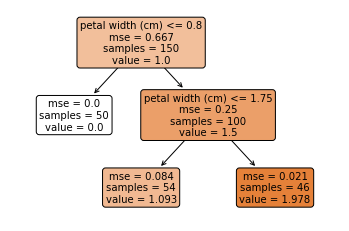

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X, y)
plot_tree(tree_reg, feature_names = iris.feature_names[2:],
class_names=iris.target_names, rounded = True, filled=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

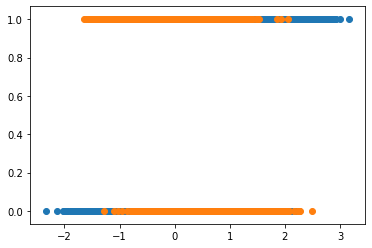

In [29]:
## Exercise

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4)
plt.scatter(X[:,0], y)
plt.scatter(X[:,1], y)

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.model_sel
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

parameters = {'max_leaf_nodes':np.arange(1, 20, 2)}

tree = DecisionTreeClassifier(max_depth = 2)
grid = GridSearchCV(tree, parameters)
grid.fit(xtrain, ytrain)
print(grid.best_score_)
print(grid.best_params_)

<IPython.core.display.Javascript object>

0.8540000000000001
{'max_leaf_nodes': 5}


In [43]:
tree = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes=5)
tree.fit(xtrain, ytrain)
y_pred = tree.predict(xtest)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, ytest)

0.857

## Random Forest

In [58]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits = 1000, train_size = 100)
y_pred = np.zeros(shape = (1000, xtest.shape[0]))
i = 0
for train_index, _ in ss.split(xtrain):
    xtrain_random, ytrain_random = xtrain[train_index], ytrain[train_index]
    tree.fit(xtrain_random, ytrain_random)
    y_pred[i, :] = tree.predict(xtest)
    i += 1

<IPython.core.display.Javascript object>

In [85]:
from scipy.stats import mode
y_pred_mode = mode(y_pred, axis = 0)
accuracy_score(y_pred_mode[0][0], ytest)

0.8625